# Probability

## Dependence and Independence
Two events E and F are dependet if knowing something about whether E happens gives us information about whether F happen.

## Conditional Probability
If two events are independent
```
P(E,F) = P(E)P(F)
```

When they are not independet
```
P(E,F) = P(E|F)P(F)
```

An example: a family with 2 unknown children.
* Each child is eqully likey to be a boy or a girl
* The gender of the second child is independent of the gender of the first one

P(no girls) = ?

P(one boy) = ?

P(two girls) = ?

P(two girls|at least one child is a girl) = P(two girls, at least one girl)/P(at least one child is a girl)

P(two girls , at least one girl) = ?
p(at least one girl) = ?


In [3]:
import enum, random

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)     
print("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## Bayes Theorem
$
P(E|F) = \dfrac{P(F|E)P(E)}{P(F)}
$

## Random Variables
A random variable is a variable whose possible values have an associated probability distribution.
```
Eg. X = 1 if a coin flip turns up heads
        0 if tails
    
Eg. Y = Number of girls in our last example
```

Expected value is the average of its values weighted by their probabilities
```
E(X) = P(heads)*1 + P(tails)*0
E(X) = 1/2

E(Y) = ?
E(Y| at least one girl) = ?
```

## Continuous Distributions
PDF -> Probability density function
$ f_X(x)$

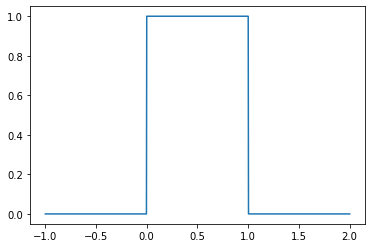

In [25]:
import matplotlib.pyplot as plt  
from scipy.stats import uniform  

import numpy as np  
  
x = np.linspace(-1, 2, 1000)  
     
# Varying positional arguments  
y1 = uniform.pdf(x, 0, 1)  
plt.plot(x, y1)  

cdf -> cumulative distribution function 

$ F_X(x) = \int_{-inf}^{x}f_X(u)du$

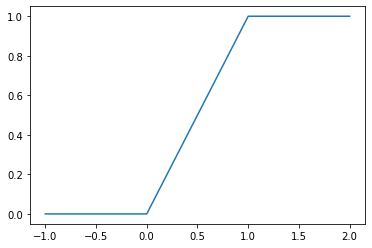

In [26]:
y2 = uniform.cdf(x, 0, 1)
plt.plot(x, y2)

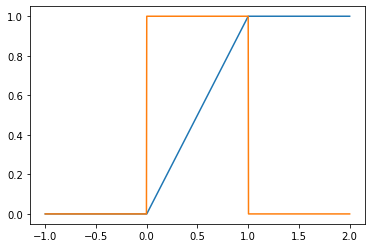

In [27]:
plt.plot(x, y2, x, y1)

## Standard Normal Distribution

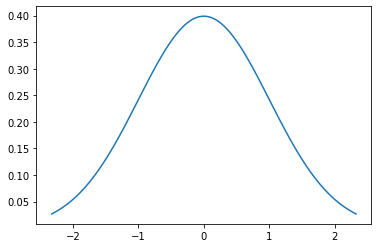

In [39]:
from scipy.stats import norm
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x), label='norm pdf')

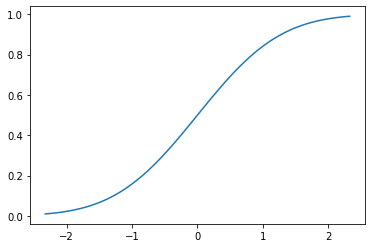

In [40]:
plt.plot(x, norm.cdf(x), label='norm cdf')

## General Normal Distribuion

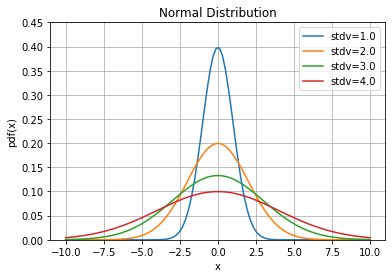

In [41]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

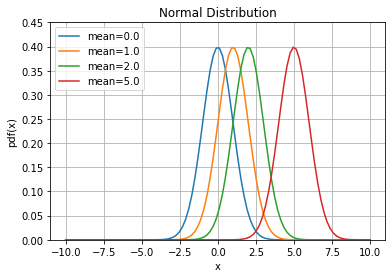

In [42]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

## Generating Values

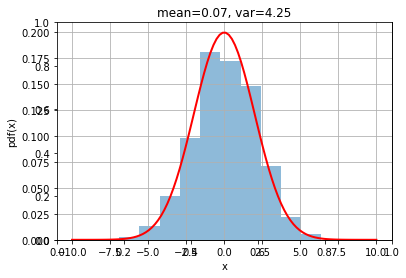

In [45]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,size=1000)
x = np.linspace(-10,10,100)
p = norm.pdf(x,scale=2)
v = np.var(xs)
m = np.mean(xs)
ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
ax.grid(True)

## General Accumulative Normal Distribution

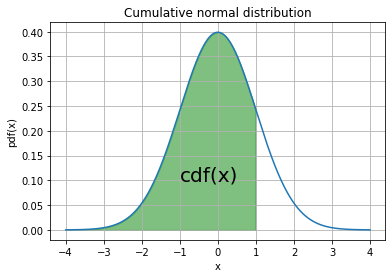

In [80]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

## Calculating values

In [59]:
from scipy.stats import norm
mean = 3
std = 2
x_point = 2
Fx = (norm.cdf(x=x_point, loc=mean, scale=std))
print(Fx)


0.3085375387259869


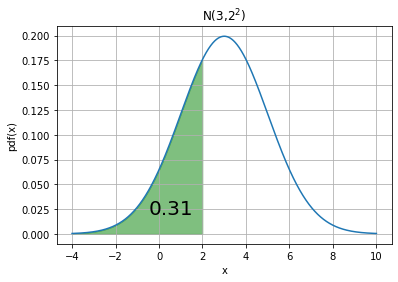

In [79]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=mean,scale=std))
ax.set_title("N({},${}^2$)".format(mean, std))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(Fx,2), fontsize=20)
plt.show()

## Interval between variables


In [62]:
norm(mean, std).cdf(2) - norm(mean, std).cdf(0.5)


0.20288776505913153

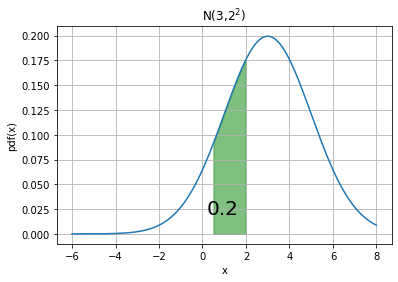

In [78]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=mean,scale=std))
ax.set_title("N({},${}^2$)".format(mean, std))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.fill_between(px,norm.pdf(px,loc=mean,scale=std),alpha=0.5, color='g')
pro=norm(mean, std).cdf(2) - norm(mean, std).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

## Finding quantiles

In [68]:
percentage = 0.506
norm.ppf(q=percentage, loc=mean, scale=std)


3.030080673357271

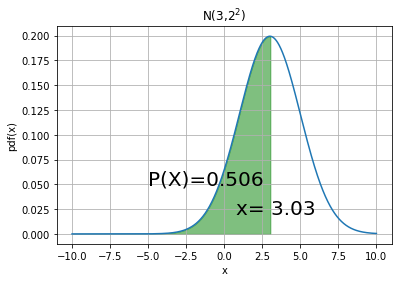

In [77]:
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=mean,scale=std))
ax.set_title("N({},${}^2$)".format(mean, std))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
xpoint=norm.ppf(q=percentage, loc=mean, scale=std)
px=np.arange(-10,xpoint,0.01)
ax.fill_between(px,norm.pdf(px,loc=mean,scale=std),alpha=0.5, color='g')
ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.506", fontsize=20)
plt.show()

## Central Limit Theorem

In [88]:
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [89]:
from collections import Counter
import math

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

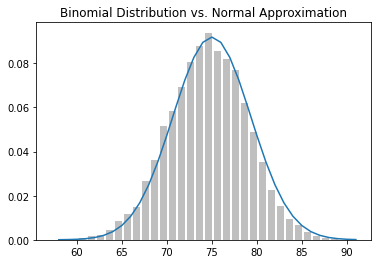

In [90]:
binomial_histogram(0.75, 100, 10000)